
#  Marketing campaigns of a Portuguese banking institution

> #### The objective of this assignment is to build a predictive model that can predict customer churn for a given company. 

**Loading Libraries and datasets**

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [405]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\bank.csv")
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [406]:
df.default.unique()

array(['no', 'yes'], dtype=object)

# DATA PREPROCESSING
- size of the datasets
- distribution of the datasets
- identifying missing values or outliers

In [407]:
df.shape

(4521, 17)

In [408]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [409]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [410]:
df.duplicated().sum()

0

In [411]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [412]:
df.shape

(4521, 17)

# Visualizing the datasets

<AxesSubplot: >

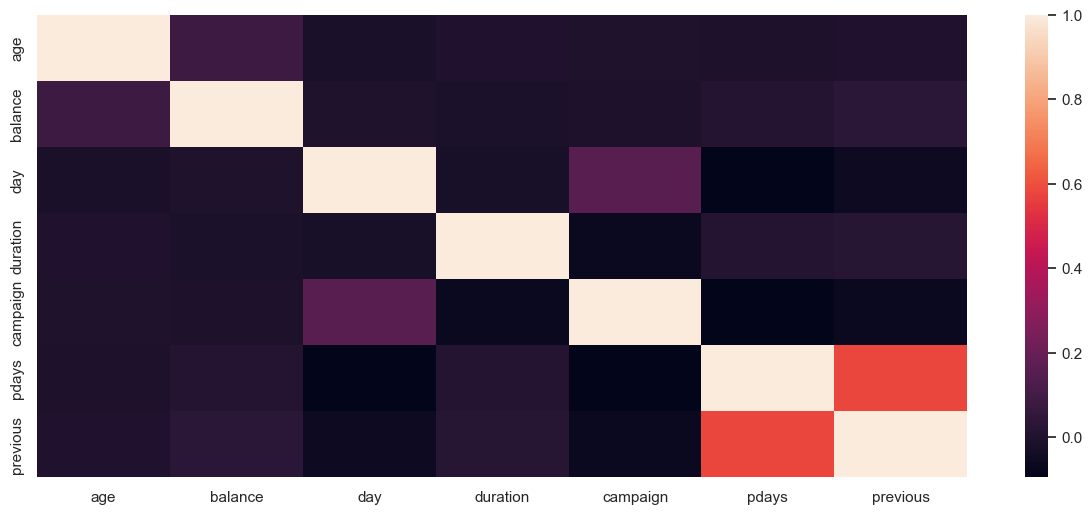

In [413]:
sns.heatmap(df.corr(), fmt='.2g')

> Age

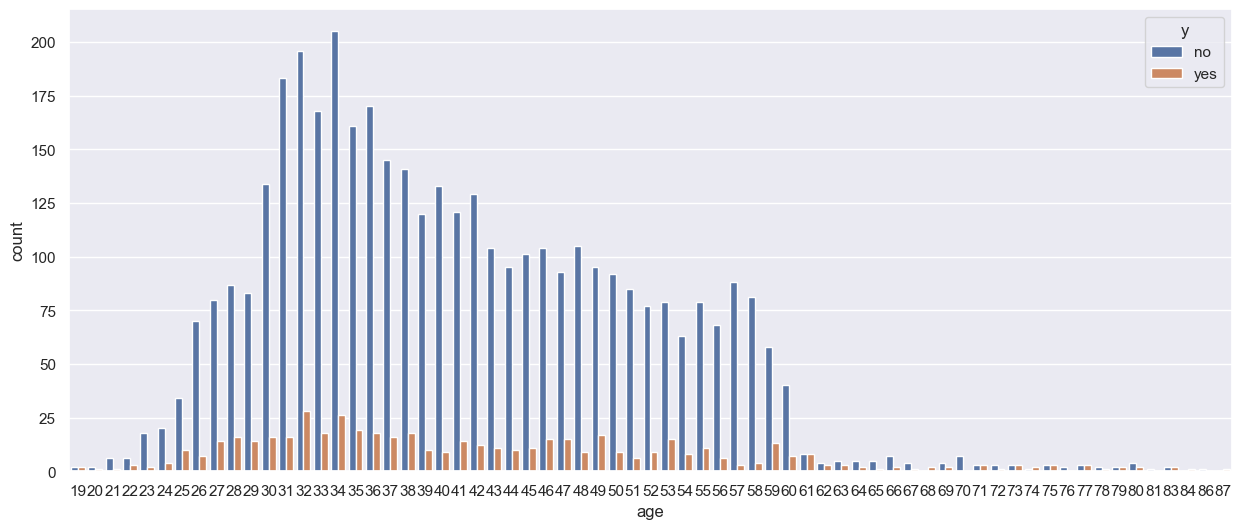

In [414]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='age', hue='y', data=df)
plt.show()

> Martial

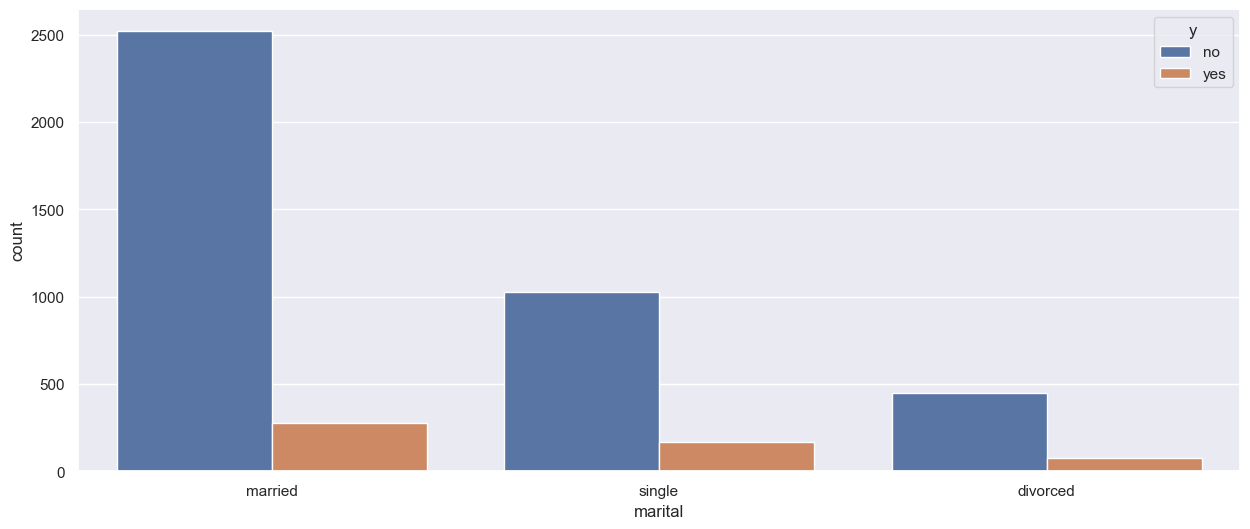

In [415]:
sns.countplot(x='marital', hue='y', data=df)
plt.show()

<AxesSubplot: xlabel='education', ylabel='count'>

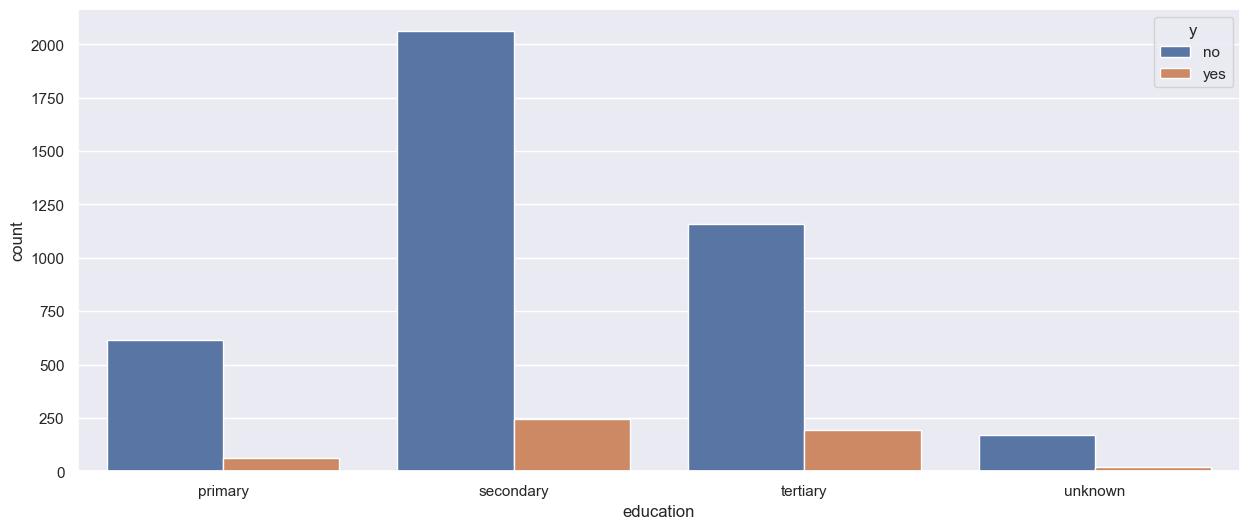

In [416]:
sns.countplot(x='education',hue='y',data=df)

> Housing

<AxesSubplot: xlabel='housing', ylabel='count'>

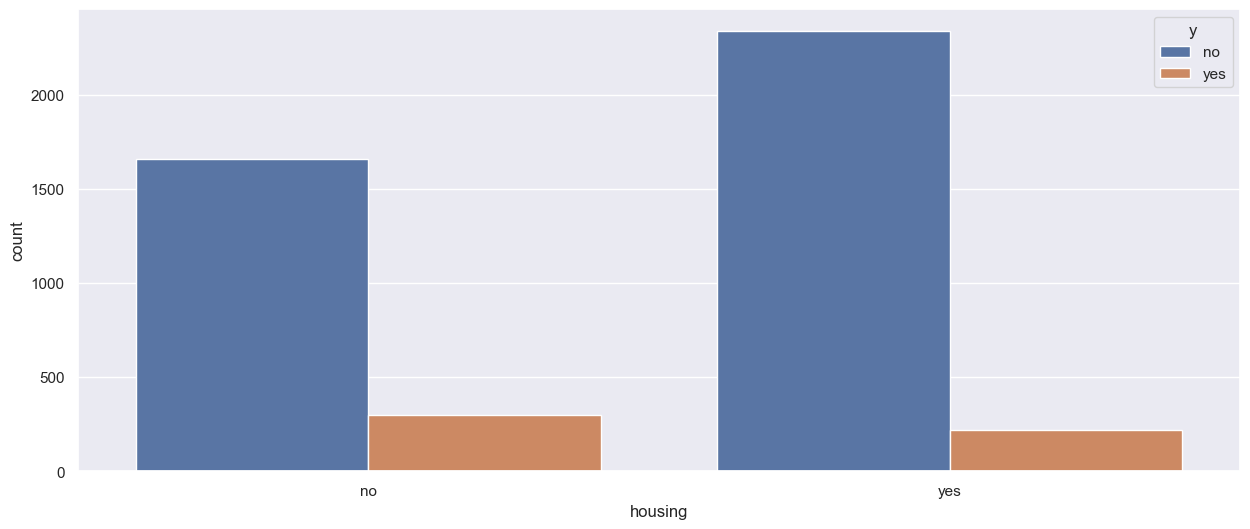

In [417]:
sns.countplot(x='housing',hue='y',data=df)

<Figure size 1200x600 with 0 Axes>

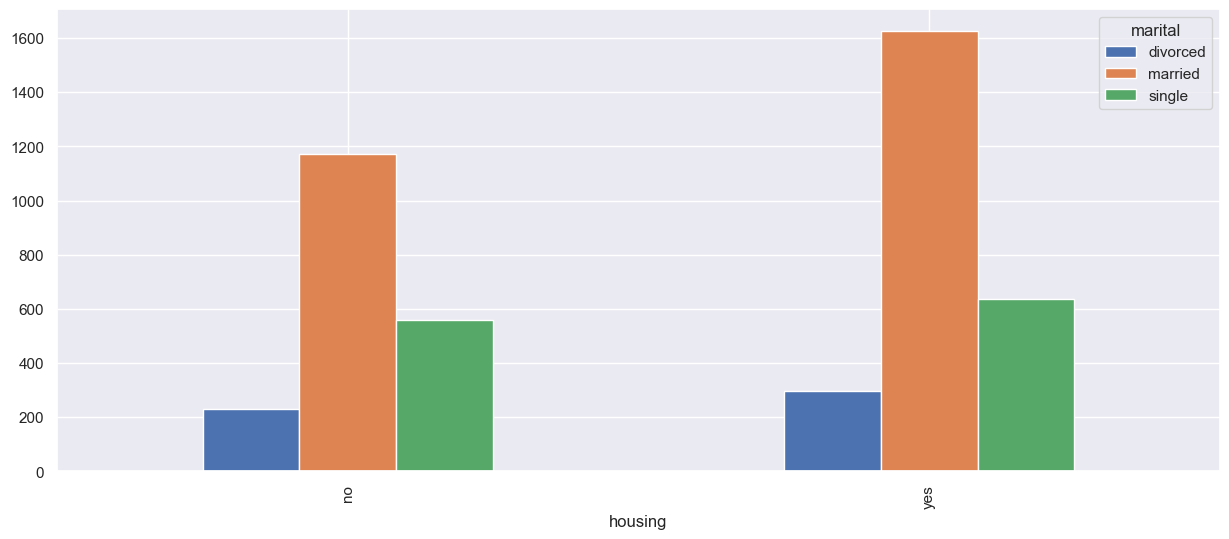

In [418]:
plt.figure(figsize=(12, 6))
table = df.pivot_table(index='housing', columns='marital', values='y', aggfunc='count')
table.plot.bar()
plt.show()

<AxesSubplot: xlabel='default', ylabel='count'>

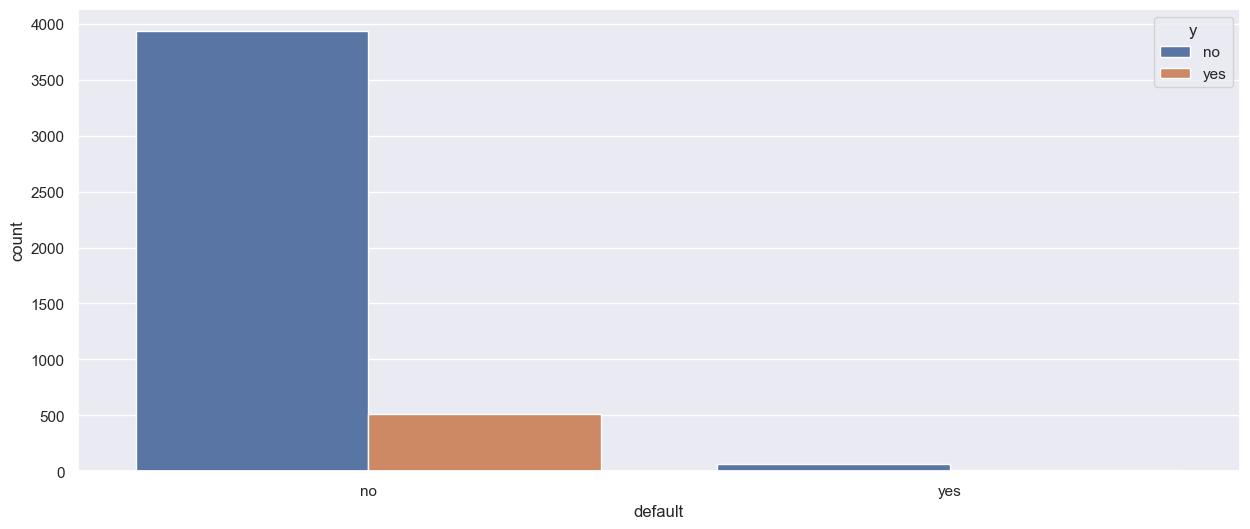

In [419]:
sns.countplot(x='default',hue='y',data=df)

In [420]:
cross_tab_default= pd.crosstab(df['default'],df['y'],margins=False)
cross_tab_default

y,no,yes
default,,
no,3933,512
yes,67,9


> month

<AxesSubplot: xlabel='month', ylabel='count'>

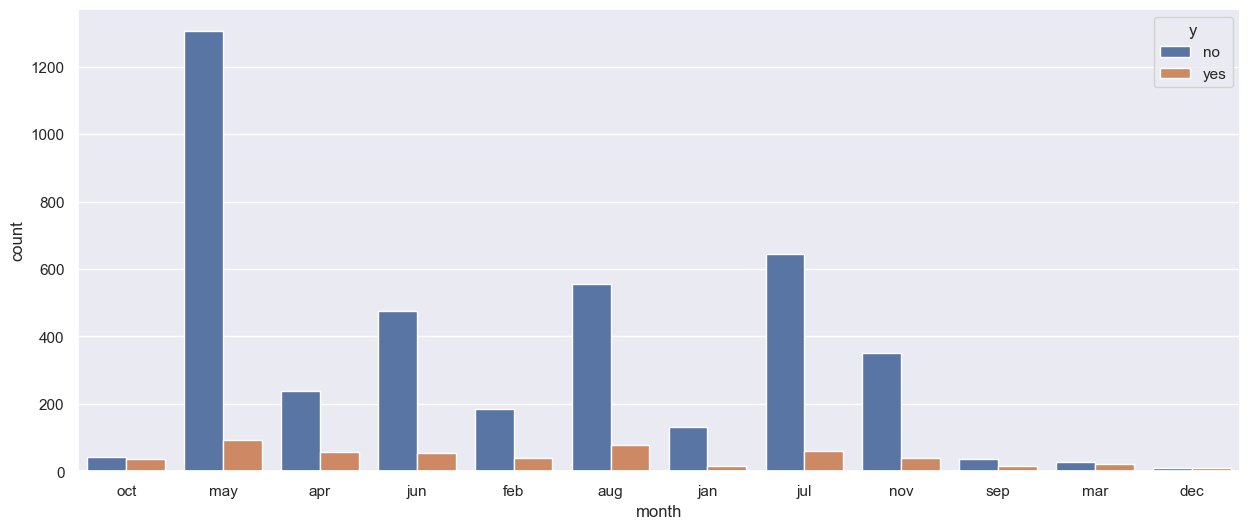

In [421]:
sns.countplot(x='month',hue='y',data=df)

<AxesSubplot: xlabel='job', ylabel='count'>

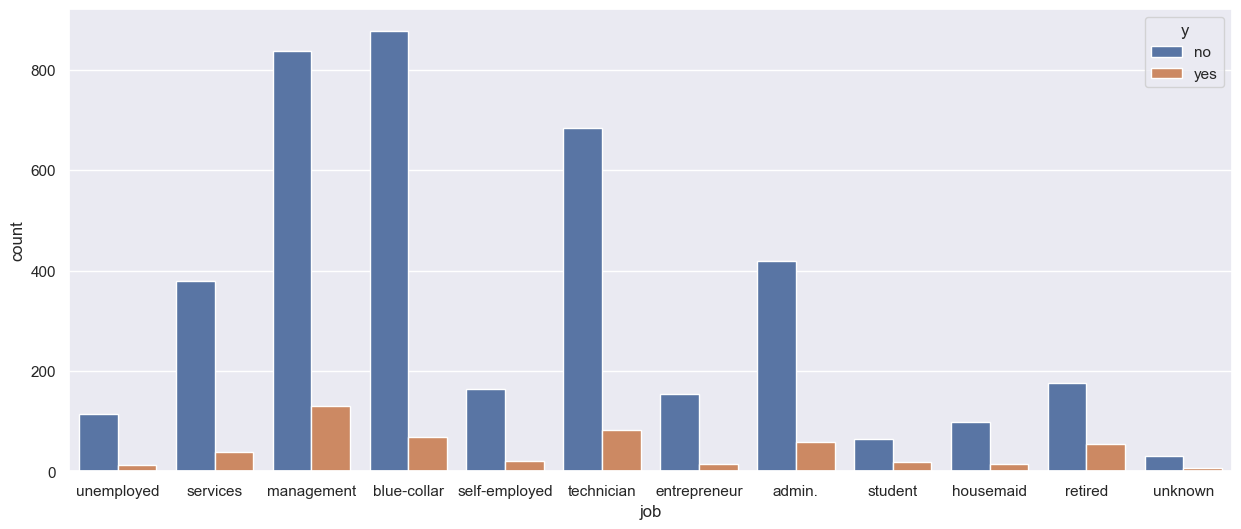

In [422]:
sns.countplot(x='job',hue='y',data=df)

<AxesSubplot: xlabel='loan', ylabel='count'>

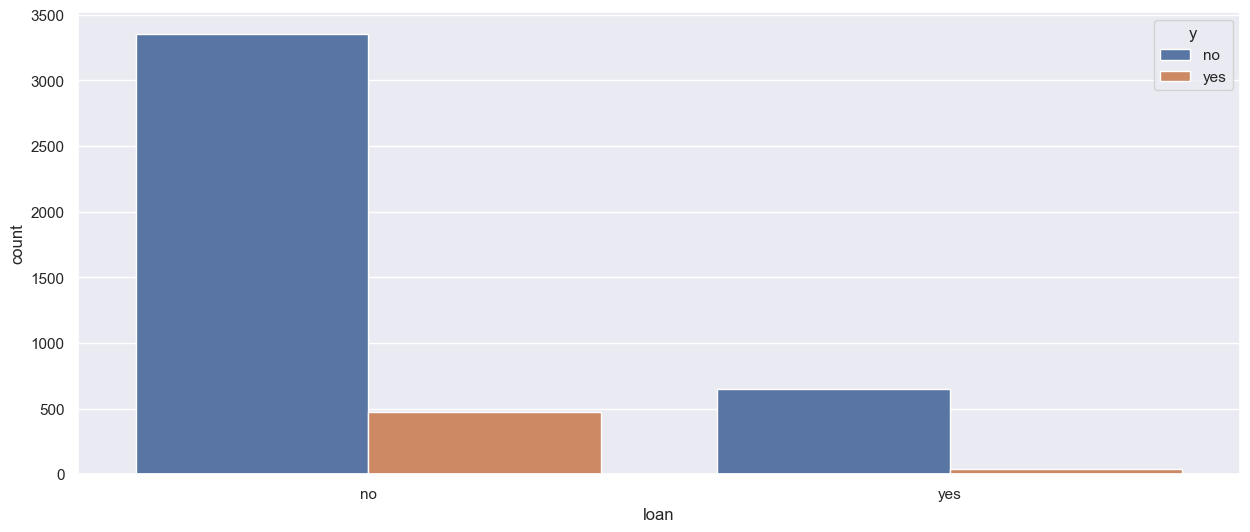

In [423]:
sns.countplot(x='loan',hue='y',data=df)

In [424]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

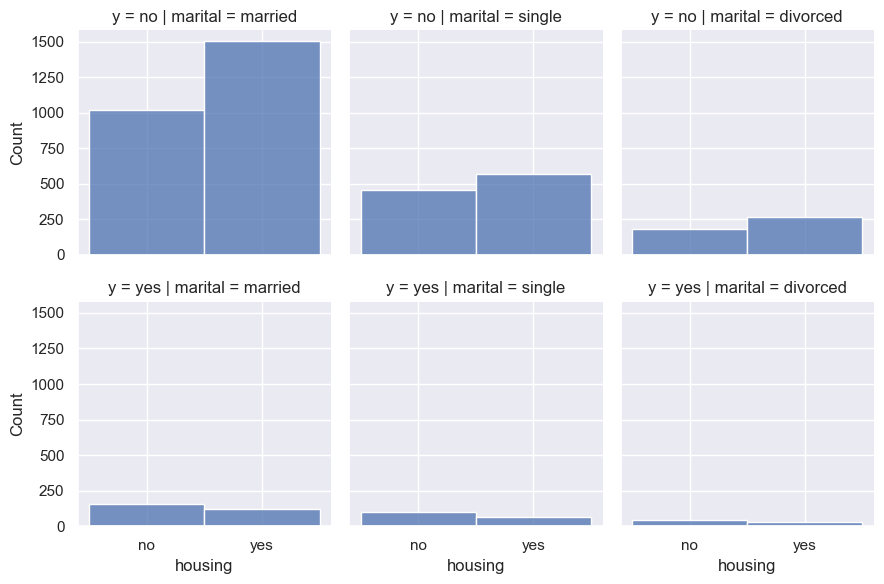

In [425]:
g = sns.FacetGrid(df, col="marital",  row="y")
g.map_dataframe(sns.histplot, x="housing")

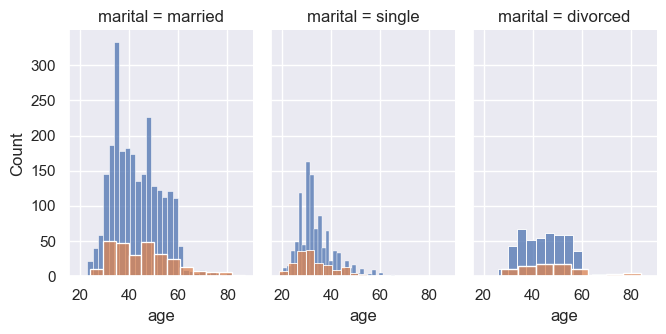

In [426]:
g = sns.FacetGrid(df, col="marital", hue='y',height=3.5, aspect=.65)
g.map(sns.histplot, "age")

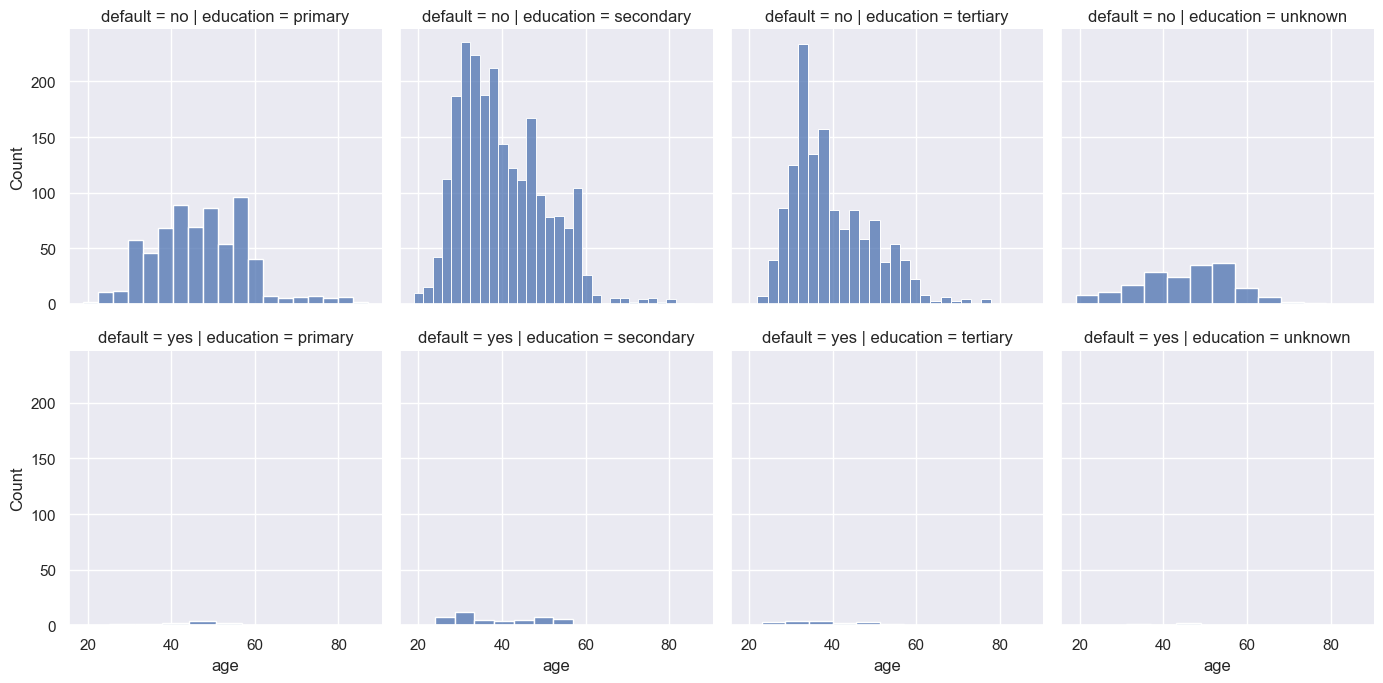

In [427]:
g = sns.FacetGrid(df, col="education", row = 'default', height=3.5)
g.map(sns.histplot, "age")

In [428]:
# label encoding

In [429]:
for col in df.columns:
    le=LabelEncoder()
    le.fit(df[col])
    df[col]=le.transform(df[col])
    print

# Train Validation Split


In [430]:
#spliting the data into train testing and validation 
from sklearn.model_selection import train_test_split

In [431]:
train_df,test_df = train_test_split(df,test_size=0.2)

In [432]:
train_df , validation_df= train_test_split(df,test_size=0.2)

> # Resampling

- try with 4 different sampling techniques.

- No sampling i.e. using the original dataset.
- Undersampling/downsampling the majority class
- Oversampling/Upsamping the minoring class
- SMOTE: Synthetic Minority Oversampling Technique

# 1. No sampling i.e. with the given dataset


In [433]:
df.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

# 2. With undersampling the major class

In [434]:
down_train=train_df['y'].value_counts()

In [435]:
min_class_count = down_train.min()
min_class_count

424

In [436]:
df_majority = train_df[train_df['y'] == 0]
df_minority = train_df[train_df['y'] == 1]
majority_indices = np.random.choice(df_majority.index, min_class_count, replace=False)
majority_undersampled = df_majority.loc[majority_indices]
undersampled_train_df = pd.concat([majority_undersampled, df_minority])

In [437]:
undersampled_train_df.y.value_counts()

0    424
1    424
Name: y, dtype: int64

# 3. With oversampling the minor class

In [438]:
# Oversample the minority class in the train dataset
minority_indices = np.random.choice(df_minority.index, min_class_count, replace=True)
minority_oversampled = df_minority.loc[minority_indices]
oversampled_train_df = pd.concat([df_majority, minority_oversampled])

In [439]:
oversampled_train_df.y.value_counts()

0    3192
1     424
Name: y, dtype: int64

# 4. With SMOTE

In [440]:
from imblearn.over_sampling import SMOTE

In [441]:
# SMOTE oversampling the minority class in the train dataset
smote = SMOTE(sampling_strategy='minority')
train_df_resampled, train_df_y = smote.fit_resample(train_df.drop('y', axis=1), train_df['y'])
train_df_resampled = pd.DataFrame(train_df_resampled, columns=train_df.drop('y', axis=1).columns)
train_df_resampled['y'] = train_df_y

In [442]:
train_df_resampled.y.value_counts()

0    3192
1    3192
Name: y, dtype: int64

In [443]:
# merging the datasets for feature engineering

In [513]:
dataset = pd.concat([train_df, test_df, validation_df], ignore_index=True)
dataset_down = pd.concat([undersampled_train_df,test_df,validation_df],ignore_index=True)
dataset_up = pd.concat([oversampled_train_df,test_df,validation_df],ignore_index=True)
dataset_smote= pd.concat([train_df_resampled,test_df,validation_df],ignore_index=True)

# FEATURE SELECTION
- using chi-square test

In [445]:
#y - has the client subscribed a term deposit? (binary: 'yes','no')

# Hypothesis
### Is there any association between features and target variable?

### CHI- Square test using sklearn library

In [446]:
from sklearn.feature_selection import SelectKBest, chi2

In [447]:
# Split the data into features and target
X = df.drop('y', axis=1)
y = df['y']

In [448]:
# Calculate the chi-square statistic between each feature and the target
ch2 = SelectKBest(chi2, k=5)
X_new = ch2.fit_transform(X, y)

In [449]:
# Create a new DataFrame to store the results
results = pd.DataFrame(ch2.scores_, columns=['chi2_score'])

In [450]:
# Add the column names to the results
results['column_name'] = X.columns

In [451]:
# Sort the results by chi-square score
results.sort_values(by='chi2_score', ascending=False, inplace=True)

In [452]:
results

,chi2_score,column_name
11,119483.934433,duration
5,11343.977063,balance
13,5374.899618,pdays
14,330.260342,previous
8,100.510079,contact
12,88.072902,campaign
0,45.840630,age
6,21.500801,housing
7,19.045258,loan
10,12.325412,month


 #### Inference
- According to the results, the feature "duration" has the highest chi-square score, indicating a strong relationship between that feature and the target. 
- The features "pdays" and "balance" also have relatively high chi-square scores, indicating that they are informative predictors.
- Features with lower scores, such as "marital" and "default" are considered to have weaker relationships with the target.
- For feature selection we can select the top k features with the highest scores for use in a machine learning model.

# FEATURE ENGINEERING
- sampling
- standardization 
- PCA

In [453]:
x_new = df[['duration','pdays','balance','previous','contact']]
y_new=df['y']

In [454]:
x_new

,duration,pdays,balance,previous,contact
0,75,0,1475,0,0
1,216,228,2030,4,0
2,181,219,1303,1,0
3,195,0,1352,0,2
4,222,0,274,0,2
...,...,...,...,...,...
4516,325,0,119,0,0
4517,149,0,0,0,2
4518,147,0,558,0,0
4519,125,140,1187,3,0


In [455]:
from sklearn.model_selection import train_test_split

In [456]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x_new)

In [457]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_scaled_pca = pca.fit_transform(x_scaled)

# MODEL BUILDING
- logictic regression
- random forest tree

> ## Logistic Regression

In [458]:
#splitting data into training and testing datasets
X_train , X_test , y_train , y_test = train_test_split(x_scaled_pca, y , test_size=0.2,random_state=0)

In [459]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [460]:
y_pred = clf.predict(X_test)

## MODEL EVALUATION For Logistic Regression
- accuracy
- precision
- recall 
- F1-score.


In [461]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)

In [462]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision * 100))
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

Accuracy: 88.95%
Precision: 60.00%
Recall: 32.14%
F1 Score: 0.42


-  A precision of 66.67% means that out of all the samples classified as positive, 66.67% are actually positive and the rest are false positive.
- A recall of 26.67% means that out of all the positive samples in the dataset, only 26.67% are correctly classified as positive.
- A F1 Score of 0.38 indicates that the classifier is not performing well in either precision or recall. 

In [463]:
# Logistic on Resampling datasets

In [464]:
# Remove the unused label from the target variable
#train_df =train_df.drop(['y'],axis=1,inplace=True)
#validation_df=validation_df.drop(['y'],axis=1, inplace=True)

# With downsampled datasets

In [465]:
X_down = dataset_down.drop('y',axis=1)
y_down = dataset_down['y']

In [466]:
X_train_down,X_test_down,y_train_down,y_test=train_test_split(X_down,y_down,test_size=0.2)

In [467]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train_down,y_train_down)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [468]:
predictions = logreg.predict(X_test_down)

In [469]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, predictions)
print("Precision: {:.2f}%".format(precision * 100))
recall = recall_score(y_test, predictions)
print("Recall: {:.2f}%".format(recall * 100))
f1 = f1_score(y_test, predictions)
print("F1 Score: {:.2f}".format(f1))

Accuracy: 80.64%
Precision: 61.45%
Recall: 41.80%
F1 Score: 0.50


# down-up datasets

In [470]:
dataset_up.y.value_counts()

0    4794
1     632
Name: y, dtype: int64

In [504]:
def logistic_regression(X_train_up,X_test_up,y_train_up,y_test_up):
    # Train the logistic regression model
    logreg = LogisticRegression(solver='lbfgs')
    logreg.fit(X_train_up,y_train_up )

    # Make predictions on the test data
    predictions = logreg.predict(X_test_up)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test_up, predictions)

    return logreg, accuracy

In [505]:
X_dataset_up = dataset_up.drop('y',axis=1)
y_dataset_up = dataset_up['y']

In [506]:
y_dataset_up.value_counts()

0    4794
1     632
Name: y, dtype: int64

In [507]:
X_train_up,X_test_up,y_train_up,y_test_up=train_test_split(X_dataset_up,y_dataset_up,test_size=0.2)

In [508]:
logreg, accuracy = logistic_regression(X_train_up, X_test_up, y_train_up, y_test_up)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [509]:
print("Accuracy: ", accuracy)
print("Precison: ",precision)
print("recall: " ,recall)
print("f1 score: ", f1)

Accuracy:  0.8830570902394107
Precison:  0.6144578313253012
recall:  0.4180327868852459
f1 score:  0.4975609756097561


# With smote datasets

In [477]:
dataset_smote.y.value_counts()

0    4794
1    3400
Name: y, dtype: int64

In [478]:
X_smote = dataset_smote.drop('y',axis=1)
y_smote = dataset_smote['y']

In [479]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.2)

In [503]:
logreg, accuracy = logistic_regression(X_train_smote,X_test_smote,y_train_smote,y_test_smote)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [481]:
print("Accuracy: ", accuracy)
print("Precison: ",precision)
print("recall: " ,recall)
print("f1 score: ", f1)

Accuracy:  0.8017083587553386
Precison:  0.6144578313253012
recall:  0.4180327868852459
f1 score:  0.4975609756097561


> ## Random Forest Algorithm

In [482]:
X=df.drop('y',axis=1)
y=df['y']

In [483]:
from sklearn.ensemble import RandomForestClassifier

In [484]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [485]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [486]:
y_pred = classifier.predict(X_test)

In [487]:
accuracy = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f11 = f1_score(y_test, y_pred)
confusion_matrix1 = confusion_matrix(y_test, y_pred)

In [488]:
print("Accuracy: {:.2f}%".format(accuracy1 * 100))
print("Precision: {:.2f}%".format(precision1 * 100))
print("Recall: {:.2f}%".format(recall1 * 100))
print("f1: {:.2f}%".format(f11 * 100))

Accuracy: 87.40%
Precision: 60.00%
Recall: 32.35%
f1: 42.04%


> ### datasets down

In [489]:
X_train_down,X_test_down,y_train_down,y_test=train_test_split(X_down,y_down,test_size=0.2)

In [490]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train_down, y_train_down)

RandomForestClassifier(random_state=0)

In [491]:
y_pred = classifier.predict(X_test_down)

In [492]:
accuracy = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f11 = f1_score(y_test, y_pred)
confusion_matrix1 = confusion_matrix(y_test, y_pred)

In [493]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("f1: {:.2f}%".format(f1 * 100))

Accuracy: 88.16%
Precision: 61.45%
Recall: 41.80%
f1: 49.76%


> ### datasets up

In [515]:
classifier_up = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_up.fit(X_train_up, y_train_up)

RandomForestClassifier(random_state=0)

In [516]:
y_pred = classifier_up.predict(X_test_up)

In [517]:
accuracy = accuracy_score(y_test_up, y_pred)
precision1 = precision_score(y_test_up, y_pred)
recall1 = recall_score(y_test_up, y_pred)
f11 = f1_score(y_test_up, y_pred)
confusion_matrix1 = confusion_matrix(y_test_up, y_pred)

In [518]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("f1: {:.2f}%".format(f1 * 100))

Accuracy: 96.13%
Precision: 61.45%
Recall: 41.80%
f1: 49.76%


> ### datasets smote

In [498]:
classifier =RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=0)

In [499]:
y_pred = classifier.predict(X_test_smote)

In [500]:
accuracy = accuracy_score(y_test_smote, y_pred)
precision1 = precision_score(y_test_smote, y_pred)
recall1 = recall_score(y_test_smote, y_pred)
f11 = f1_score(y_test_smote, y_pred)
confusion_matrix1 = confusion_matrix(y_test_smote, y_pred)

In [501]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("f1: {:.2f}%".format(f1 * 100))

Accuracy: 93.53%
Precision: 61.45%
Recall: 41.80%
f1: 49.76%


# Final Submission

In [514]:
# Assign the best model and best dataset
# oversampled_train_df

In [524]:
best_model = classifier_up
best_data  = oversampled_train_df
best_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2497,23,1,1,0,0,752,1,0,2,13,8,501,1,0,0,3,0
2867,8,10,2,2,0,275,0,0,0,2,3,61,1,0,0,3,0
3177,13,4,2,2,0,2283,1,0,0,10,1,91,1,0,0,3,0
597,18,3,1,0,0,460,0,0,0,7,1,144,3,0,0,3,0
999,1,8,2,1,0,554,0,0,1,10,8,168,4,259,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,42,9,1,1,0,1226,0,0,0,20,8,210,3,0,0,3,1
3006,32,6,1,3,0,1566,0,0,0,7,6,447,5,0,0,3,1
2822,19,2,1,2,0,441,1,0,0,17,8,434,0,0,0,3,1
99,12,10,2,0,0,662,0,0,0,3,3,665,0,0,0,3,1


In [525]:
y_pred = classifier_up.predict(X_test_up)

In [526]:
best_data.to_csv("submission.csv", index=False)

# MODEL OPTIMIZATION
- hyperparameters
- experimenting with different algorithms, or adding new features.

In [528]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {'n_estimators': [10, 20, 30],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Create a Random Forest Classifier
rfc = RandomForestClassifier()

# Run a grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_up, y_train_up)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print("Best hyperparameters:", best_hyperparameters)


Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 30}


# INTERPRETATION
- Interpreting the results of the model and drawing conclusions about the data
- The higher the education, the more succesful is the marketing campaign. Those profiles with a higher education (tertiary) are more willing to say yes to the term deposit.
- Management seems to be the job position that holds a bigger amount of subscriptions. This is probably in accordance with higher education levels being more receptive to our campaigns, as mentioned above.
- The majority of contacted customers have no loan with our institution.
- Those customers who do not have a loan present a higher participation in the subscription. It could be assumed that not having a loan equals more disposable income available for other investment opportunities such as term deposits.
- Having a housing loan doesn’t seem to be a decisive factor when considering investing into term deposits as both graphs are approximately the same.However, when it comes to positive response rates, those costumers that do not have a loan for their house have a higher rate to term deposit subscription.
- How does the variable housing change when adding relationship status to it. The assumption would be that Single people probably have less housing loans compared to people married or divorced, assuming one only gets a house after marriage. However, at least within our training data customers, that is not the case. Customers, even though they are single, are more likely to have housing loans than not.
- Clients that have never been contacted before are all labelled unknown (pdays = -1, previous = 0). Clients with “others” have been previously contacted but we do not know the outcome.
- Downsampling performed the best in random forest.

